In [1]:
%matplotlib widget

import handcalcs.render
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import forallpeople as si
import matplotlib as mpl

si.environment('custom')

In [2]:
table = pd.read_excel("hyphal_length.xlsx")

table = table.loc[table["Title"]!=" External hyphal production of vesicular-arbuscular mycorrhizal fungi in pasture and tallgrass prairie communities"]

table["hypha_mm_mm3"] = table["hypha_m_cm3"]
table["abs_lat"] = abs(table["lat"])
table["colonization_perc"] = table["colonization_perc"].astype(str).str.replace("na","nan").replace("nann","nan").astype(float)
table["symbiont_genus"].replace('Natural ', 'Natural', inplace=True)
table["pot_field"].replace('fieled', 'field', inplace=True)

table['bulk_density_g/cm3'].fillna(1, inplace=True)
table['hypha_m_cm3'].fillna(table['hypha_cm_g'] * table['bulk_density_g/cm3']/100, inplace=True)

In [3]:
select = table.loc[table["depth_cm"]<=30]
select = select.loc[select["pot_field"]=="field"]

In [4]:
%%render

d_hypha_grass = np.mean(select.loc[select["landcover_8_clases_ESA"]=="Grassland"]["hypha_m_cm3"])*si.m*((si.m)*(1e-2))**(-3)
grass_surface = 50*1e6*(si.m*1e3)**2
depth = 0.3 *si.m

tot_length = d_hypha_grass*grass_surface*depth
r = 2.5 *si.m*1e-6
tot_volume = pi*r**2*tot_length
density = 1 *1e3 *si.kg*si.m**(-3)
tot_wet_mass = tot_volume*density
C_ratio = 0.5
dry_ratio = 0.3
tot_dw = dry_ratio * tot_wet_mass
tot_C_grassland = C_ratio*tot_dw
tot_C_milo = 0.15*1e9*1e3*si.kg

<IPython.core.display.Latex object>

In [5]:
pi*r**2*C_ratio*dry_ratio*density*1e9

2.945 kg·m⁻¹

In [5]:
%%render

d_hypha_crop = np.mean(select.loc[select["landcover_8_clases_ESA"]=="Cropland"]["hypha_m_cm3"])*si.m*((si.m)*(1e-2))**(-3)
cropland_surface = 1244*1e6*(si.m*1e2)**2
depth = 0.2 *si.m

tot_length = d_hypha_crop*cropland_surface*depth
tot_volume = pi*r**2*tot_length
density = 1 *1e3 *si.kg*si.m**(-3)
tot_wet_mass = tot_volume*density
C_ratio = 0.5
dry_ratio = 0.1
tot_dw = dry_ratio * tot_wet_mass
tot_C_crop = C_ratio*tot_dw


<IPython.core.display.Latex object>

In [6]:
%%render

d_hypha_forest = np.mean(select.loc[select["landcover_8_clases_ESA"]=="Forest"]["hypha_m_cm3"])*si.m*((si.m)*(1e-2))**(-3)
forest_surface = 40*1e6*(si.m*1e3)**2
depth = 0.4 *si.m

tot_length = d_hypha_forest*forest_surface*depth
tot_volume = pi*r**2*tot_length
density = 1 *1e3 *si.kg*si.m**(-3)
tot_wet_mass = tot_volume*density
C_ratio = 0.5
dry_ratio = 0.1
tot_dw = dry_ratio * tot_wet_mass
tot_C_forest = C_ratio*tot_dw


<IPython.core.display.Latex object>

Text(0, 0, 'Total: 102 Mm²')

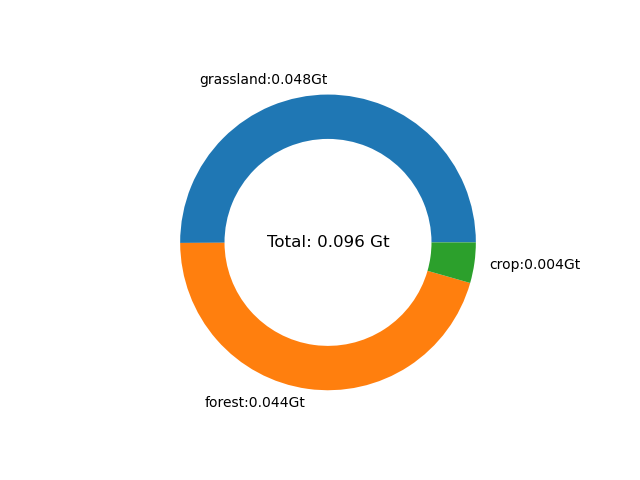

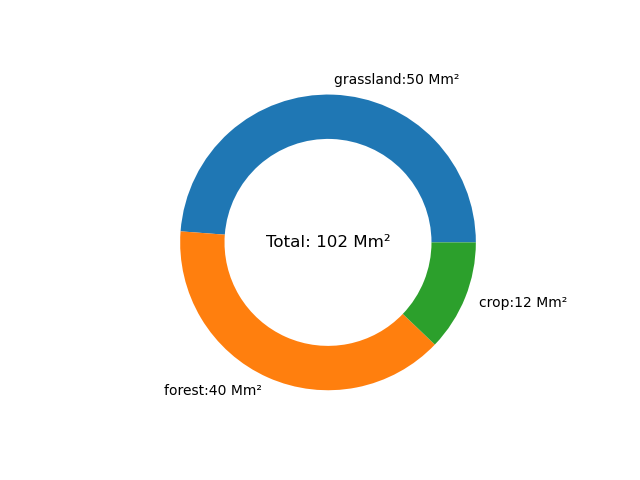

In [9]:
sizes = [tot_C_grassland, tot_C_forest,tot_C_crop]
labels = ["grassland", "forest","crop"]
labels = [label+":"+str(round(sizes[i].split()[0]/1e12,3))+"Gt" for i,label in enumerate(labels)]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, wedgeprops={'width': 0.3})
total = round(sum(sizes).split()[0]/1e12,3)
ax.text(0, 0, f'Total: {total} Gt', fontsize=12, va='center', ha='center')
sizes = [grass_surface, forest_surface,cropland_surface]
labels = ["grassland", "forest","crop"]

fig, ax = plt.subplots()
labels = [label+":"+str(round(sizes[i])) for i,label in enumerate(labels)]

ax.pie(sizes, labels=labels, wedgeprops={'width': 0.3})
total = round(sum(sizes))
ax.text(0, 0, f'Total: {total}', fontsize=12, va='center', ha='center')

In [10]:
def global_estimate(r_value,depth_value = 0.3):
    d_hypha_grass = np.mean(select.loc[select["landcover_8_clases_ESA"]=="Grassland"]["hypha_m_cm3"])*si.m*((si.m)*(1e-2))**(-3)
    grass_surface = 50*1e6*(si.m*1e3)**2
    depth = depth_value *si.m

    tot_length = d_hypha_grass*grass_surface*depth
    r = r_value *si.m*1e-6
    tot_volume = pi*r**2*tot_length
    density = 1.1 *1e3 *si.kg*si.m**(-3)
    tot_wet_mass = tot_volume*density
    C_ratio = 0.5
    dry_ratio = 0.1
    tot_dw = dry_ratio * tot_wet_mass
    tot_C_grassland = C_ratio*tot_dw
    d_hypha_crop = np.mean(select.loc[select["landcover_8_clases_ESA"]=="Cropland"]["hypha_m_cm3"])*si.m*((si.m)*(1e-2))**(-3)
    cropland_surface = 1244*1e6*(si.m*1e2)**2
    depth = depth_value *si.m

    tot_length = d_hypha_crop*cropland_surface*depth
    tot_volume = pi*r**2*tot_length
    density = 1.1 *1e3 *si.kg*si.m**(-3)
    tot_wet_mass = tot_volume*density
    C_ratio = 0.5
    dry_ratio = 0.1
    tot_dw = dry_ratio * tot_wet_mass
    tot_C_crop = C_ratio*tot_dw
    d_hypha_forest = np.mean(select.loc[select["landcover_8_clases_ESA"]=="Forest"]["hypha_m_cm3"])*si.m*((si.m)*(1e-2))**(-3)
    forest_surface = 40*1e6*(si.m*1e3)**2
    depth = (depth_value+0.5) *si.m

    tot_length = d_hypha_forest*forest_surface*depth
    tot_volume = pi*r**2*tot_length
    density = 1.1 *1e3 *si.kg*si.m**(-3)
    tot_wet_mass = tot_volume*density
    C_ratio = 0.5
    dry_ratio = 0.1
    tot_dw = dry_ratio * tot_wet_mass
    tot_C_forest = C_ratio*tot_dw
    return(tot_C_grassland + tot_C_forest+tot_C_crop)

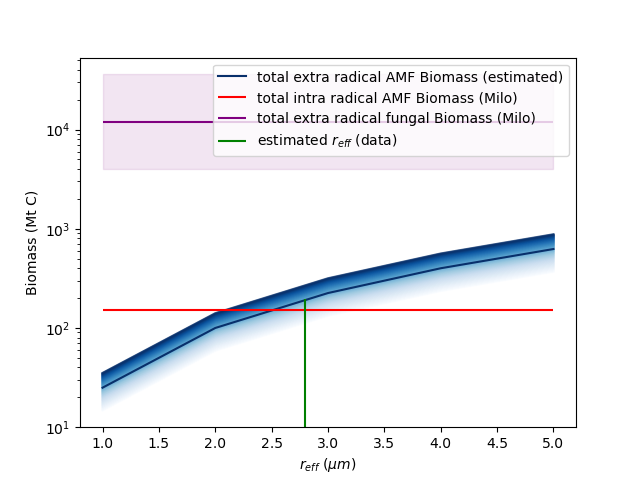

In [13]:
fig, ax = plt.subplots()
cmap = mpl.cm.get_cmap("Blues")
depth_max = 0.5
depth_min = 0.1

for depth in np.linspace(depth_min,depth_max,60):
    tot_Cs = [global_estimate(r_value,depth) for r_value in range(1,6)]
    ax.plot(range(1,6),tot_Cs,color = cmap((depth-depth_min)/(depth_max-depth_min)),alpha = 0.7)
tot_Cs = [global_estimate(r_value) for r_value in range(1,6)]
ax.plot(range(1,6),tot_Cs,color = cmap((depth-depth_min)/(depth_max-depth_min)),label="total extra radical AMF Biomass (estimated)")
ax.hlines(tot_C_milo,xmin=1,xmax=5,label="total intra radical AMF Biomass (Milo)",color="red")
C_fungi = 12000
ax.hlines(C_fungi,xmin=1,xmax=5,label="total extra radical fungal Biomass (Milo)",color="purple")
ax.fill_between([1,5],[C_fungi/3,C_fungi/3],[C_fungi*3,C_fungi*3],color="purple",alpha = 0.1)
ax.vlines(2.8,ymin =0,ymax = global_estimate(2.8) ,color = "green",label="estimated $r_{eff}$ (data)")
ax.set_ylabel('Biomass (Mt C)')
ax.set_xlabel('$r_{eff}$ ($\mu m$)')
ax.set_yscale('log')
ax.legend()
# im = ax.imshow(data.reshape(-1, 1), cmap='Blues')
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label('Depth used for soil volume (cm)')

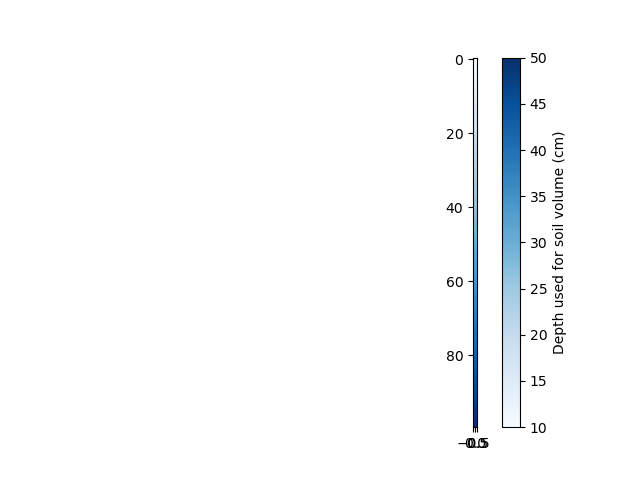

In [12]:
data = np.linspace(depth_min*100, depth_max*100, 100)

fig, ax = plt.subplots()
im = ax.imshow(data.reshape(-1, 1), cmap='Blues')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Depth used for soil volume (cm)')